In [43]:
def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def render_ep (boat_plot):
    #true wind vector
    #starting point
    #target point
    #PENDING: spline connecting each point
    from matplotlib import pyplot as plt
    boat_plot=np.split(boat_plot,len(boat_plot)/2)
    boat_plot=np.array(boat_plot)
    # Scatter plot
    #light blue -> darker blue 
    #target_plot=env.target_position
    x=boat_plot[:, 0]
    y=boat_plot[:, 1]
    weights = np.arange(1,boat_plot[:, 1].shape[0]+1)
    plt.scatter(x, y, c=weights, cmap='Blues')
    #plt.scatter(target_plot[0], target_plot[1],c='red')
    # Display the plot
    plt.show()
    #plt.xlim(min(x),max(x))
    #plt.ylim(min(y),max(y))


In [78]:
import numpy as np

class SailBoatEnvironment:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.35):
        self.step_num=0
        #self.true_wind_direction = np.random.uniform(0, 2*np.pi)
        #self.boat_position = np.array([222, 222])
        #self.target_position = np.array([np.random.uniform(-10, 10), np.random.uniform(-10, 10)])
        self.sail_configs = np.linspace(0, 1, 16) #16 allowed positions of the sail
        self.rudder_configs = np.linspace(-np.pi/4, np.pi/4, 16) #The values of -np.pi/4 and np.pi/4 are chosen to represent the limits of the rudder configuration. These values correspond to the maximum angles 
                                                                #that the rudder can be turned left and right from the center position.The choice of np.pi/4 as the maximum #
                                                                # angle is somewhat arbitrary, but it is a common choice in sailing and boating applications.
        self.target_possible_angles=np.rad2deg(np.linspace(0, 2*np.pi, 16))
        
        
        #self.q_table = np.zeros((16, 16, 3))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def reset(self):
        #returns
        #i)boat position: starting point of boat        
        #ii)random wind direction, epistrefei to index sto self.target_possible_angles
        #iii)ypologizei thn target angle, thn diakritopoiei se mia apo tis dekaksi times kai epistrefei to index
        #toy self.target_possible_angles
        self.step_num=0
        #self.true_wind_direction = np.pi/2# np.random.uniform(0, 2*np.pi)
        self.true_wind_direction = np.random.choice(np.rad2deg(np.linspace(0, 2*np.pi, 16)))
        self.boat_position = np.array([0, 0]) #fixed starting point
        self.target_position = np.array([55,100]) #fixed target position
        self.max_distance=np.linalg.norm(self.boat_position-self.target_position)
        self.target_angle=angle_between(self.boat_position, self.target_position)
        self.target_angle=find_nearest(self.target_possible_angles, value=self.target_angle)
        return self.boat_position, np.where(self.true_wind_direction==self.target_possible_angles)[0][0], \
        np.where(self.target_angle==self.target_possible_angles)[0][0]
        
        

    def get_state(self):
        relative_wind_direction = self.true_wind_direction - np.arctan2(*self.boat_position[::-1])
        #relative_wind_direction = find_nearest(self.target_possible_angles, value=relative_wind_direction)
        distance_to_target = np.linalg.norm(self.boat_position - self.target_position)
        return relative_wind_direction, distance_to_target

    def step(self, action):
        #returns
        #i)boat position: starting point of boat        
        #ii)random wind direction, epistrefei to index sto self.target_possible_angles
        #iii)ypologizei thn target angle, thn diakritopoiei se mia apo tis dekaksi times kai epistrefei to index
        #toy self.target_possible_angles
        #iv) step reward
        #v) done status
        #vi) truncated status
        #vii) number of steps
        sail_config, rudder_config = action
        sail_force = sail_config * np.sin(self.true_wind_direction - np.arctan2(*self.boat_position[::-1]))
        rudder_force = rudder_config * np.cos(self.true_wind_direction - np.arctan2(*self.boat_position[::-1]))
        boat_velocity = np.array([np.cos(self.true_wind_direction), np.sin(self.true_wind_direction)]) * sail_force + np.array([-np.sin(self.true_wind_direction), np.cos(self.true_wind_direction)]) * rudder_force
        self.boat_position = self.boat_position + boat_velocity#.astype(np.float64)
        self.target_angle=angle_between(self.boat_position, self.target_position)
        self.target_angle=find_nearest(self.target_possible_angles, value=self.target_angle)
        
        state = self.get_state()
        self.step_num+=1
        done = False
        truncated = False
        reward = -1

        #if np.any(np.abs(self.boat_position) > 20):
            #done = True
            #reward = -10

        distance_to_target = state[1]
        if distance_to_target < 0.5:
        #if distance_to_target//self.max_distance < 0.5: #kapws pio sxetiko giati den kseroume to distance 0.5
            #an einia megalo h mikro
            done = True
            reward = 150
        
        if self.step_num >= 100:
            truncated = True
            done = True #gia na spaei h loupa tou training

#         # Q-learning update
#         sail_idx = np.argmin(np.abs(self.sail_configs - sail_config))
#         rudder_idx = np.argmin(np.abs(self.rudder_configs - rudder_config))
#         q_current = self.q_table[sail_idx, rudder_idx, 0]
#         q_next = np.max(self.q_table[sail_idx, rudder_idx, :])
#         self.q_table[sail_idx, rudder_idx, 0] += self.alpha * (reward + self.gamma * q_next - q_current)

        #return boat_velocity, self.boat_position, state, reward, done, self.step_num, self.target_angle
        return self.boat_position, np.where(self.true_wind_direction==self.target_possible_angles)[0][0],\
        np.where(self.target_angle==self.target_possible_angles)[0][0], reward, \
        done, truncated, self.step_num


# Plot random movement

In [79]:
env=SailBoatEnvironment()
env.reset()
done=False
truncated=False
boat_plot=[]
while not truncated:
    mlist=np.random.choice(np.linspace(0, 1, 16)), np.random.choice(np.linspace(-np.pi/4, np.pi/4, 16))
    boat_pos, true_wind_index, target_angle_index,  reward, done, truncated, step_num = env.step(mlist)
    #print(truncated)
    boat_plot=np.append(boat_plot,np.array(boat_pos))
#print(step_num)
boat_plot
#render_ep(boat_plot)

array([ 9.32349208e-02,  8.77572613e-02, -2.72977691e-01,  6.21496419e-01,
       -9.07745526e-01,  4.17625573e-01, -1.43120439e+00, -2.12955396e-01,
       -1.72766380e+00,  1.66929687e-01, -1.93768561e+00,  1.37398569e-01,
       -2.02913738e+00, -2.53080643e-01, -1.85998773e+00, -7.87455313e-01,
       -1.60448848e+00, -1.41802153e+00, -1.34368243e+00, -2.10497150e+00,
       -8.82235151e-01, -1.97470808e+00, -5.50198315e-01, -1.65110819e+00,
       -4.86313541e-01, -1.23731819e+00, -3.00793669e-01, -7.52686906e-01,
       -3.72444920e-01, -2.87323283e-01, -5.13862648e-01,  2.48580340e-01,
       -1.33363390e+00,  3.60603586e-01, -1.83694258e+00,  3.34503595e-02,
       -1.91187618e+00,  1.60969023e-01, -1.95615201e+00, -2.09393099e-01,
       -1.82863395e+00, -9.73653830e-01, -2.02357404e+00, -4.36509660e-01,
       -1.90609611e+00, -1.11177417e+00, -1.62405022e+00, -1.39140223e+00,
       -1.19223687e+00, -1.70172377e+00, -7.86520086e-01, -2.24255904e+00,
       -4.64855438e-01, -

In [81]:
boat_plot[0]

0.09323492080054036

# Start env & Define Q Table

In [82]:
env=SailBoatEnvironment()
#prwto einai gia true wind angles
a=len(env.target_possible_angles)
#deytera gia gwnies pros target
#trito ola ta possible actions
b=32
q_table = np.random.uniform(low=-2, high=0, size=(a,a,b))
#q_table
#wd=0,1,2 # wd=1
#dt=0,1 #dt=0 makria, dt=1 konta
#np.argmax(q_table[1,1])
#
#rudder conf = 0:15th column
#np.argmax(q_table[state,0:15])
#sail conf = 16:31th columns
#np.argmax(q_table[state,16:32])



# Train Q table

0
1
2
3
4


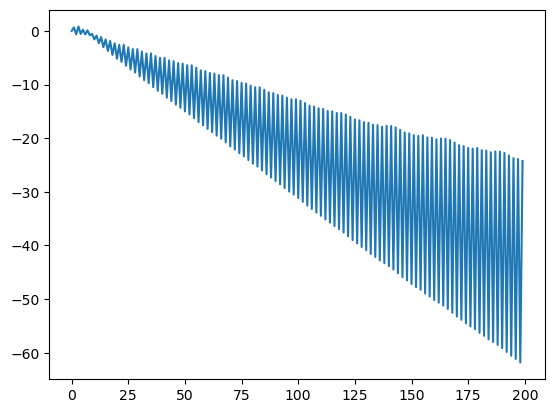

In [83]:
env = SailBoatEnvironment()
EPISODES = 5
boat_plot = []
boat_plot_all_ep = []
for i in range(EPISODES):
    boat_plot = []
    current_state = env.reset()
    current_state = current_state[1], current_state[2]
    done = False
    truncated = False
    while not done:
        sail_conf_index = np.argmax(q_table[(current_state)][0:15])
        rudder_conf_index = np.argmax(q_table[(current_state)][15:33])
        action = env.sail_configs[sail_conf_index], env.rudder_configs[15-rudder_conf_index]
        result = env.step(action)
        boat_pos = result[0]
        true_wind_index = result[1]
        target_angle_index = result[2]
        reward = result[3]
        done = result[4]
        truncated = result[5]
        new_state = true_wind_index, target_angle_index
        boat_plot = np.append(boat_plot, np.array(boat_pos))
        boat_plot_all_ep = np.concatenate((boat_plot_all_ep, boat_plot), axis=0)
        Q_max_sail = np.max(q_table[(current_state)][0:15])
        Q_max_rudder = np.max(q_table[(current_state)][15:33])
        q_current_sail = q_table[current_state+(sail_conf_index,)]
        q_current_rudder = q_table[current_state+(15+sail_conf_index,)]
        new_q_sail = (1-env.alpha)*q_current_sail + env.alpha*(reward + env.gamma*Q_max_sail)
        new_q_rudder = (1-env.alpha)*q_current_rudder + env.alpha*(reward + env.gamma*Q_max_rudder)
        q_table[current_state+(sail_conf_index,)] = new_q_sail
        q_table[current_state+(15+sail_conf_index,)] = new_q_rudder
        current_state = new_state
    print(i)

plt.plot(boat_plot)
plt.show()



In [84]:
ini_array = np.array([[1, 2, 3], [45, 4, 7], [9, 6, 10]])
print(f"initial-> {ini_array}")
# Array to be added as column
column_to_be_added = np.array([[1], [2], [3]])
 
# Adding column to array using append() method
arr = np.concatenate([ini_array, column_to_be_added], axis=1)
print("\\\\\\\\\\\\")
 
# printing result
print ("resultant array", str(arr))

initial-> [[ 1  2  3]
 [45  4  7]
 [ 9  6 10]]
\\\\\\
resultant array [[ 1  2  3  1]
 [45  4  7  2]
 [ 9  6 10  3]]


In [85]:
boat_plot_all_ep.shape

(50500,)

# Test Q Table

In [86]:
env=SailBoatEnvironment()
for i in range(100):
    current_state=env.reset()
    current_state=current_state[1], current_state[2]
    done=False
    while not done:
    #rudder_conf=env.rudder_configs[rudder_conf_index]
    #rudder_conf
        sail_conf_index=np.argmax(q_table[(current_state)][0:15])
        rudder_conf_index=np.argmax(q_table[(current_state)][15:33])
        #sail_conf=env.sail_configs[sail_conf_index]
        #sail_conf
        action=env.sail_configs[sail_conf_index],env.rudder_configs[15-rudder_conf_index]
        boat_pos,  true_wind_index, target_angle_index, reward, done, truncated, step_num = env.step(action)
        new_state=true_wind_index, target_angle_index
        #plotting a single episode
        #boat_plot=np.append(boat_plot,np.array(boat_pos))
#         Q_max_sail=np.max(q_table[(current_state)][0:15])
#         Q_max_rudder=np.max(q_table[(current_state)][15:33])
#         q_current_sail=q_table[current_state+(sail_conf_index,)]
#         q_current_rudder=q_table[current_state+(15+sail_conf_index,)]
#         new_q_sail=(1-env.alpha)*q_current_sail+env.alpha*(reward+env.gamma*Q_max_sail)
#         new_q_rudder=(1-env.alpha)*q_current_rudder+env.alpha*(reward+env.gamma*Q_max_rudder)
#         q_table[current_state+(sail_conf_index,)]=new_q_sail
#         q_table[current_state+(15+sail_conf_index,)]=new_q_rudder
        current_state=new_state
        positions_per_episode.append(len(boat_plot))
    if i%5==0:
        print(f"{i}-th ep -> steps: {step_num}")

0-th ep -> steps: 100
5-th ep -> steps: 100
10-th ep -> steps: 100
15-th ep -> steps: 100
20-th ep -> steps: 100
25-th ep -> steps: 100
30-th ep -> steps: 100
35-th ep -> steps: 100
40-th ep -> steps: 100
45-th ep -> steps: 100
50-th ep -> steps: 100
55-th ep -> steps: 100
60-th ep -> steps: 100
65-th ep -> steps: 100
70-th ep -> steps: 100
75-th ep -> steps: 100
80-th ep -> steps: 100
85-th ep -> steps: 100
90-th ep -> steps: 100
95-th ep -> steps: 100


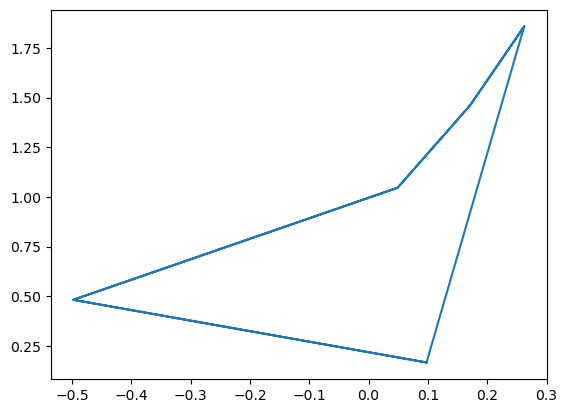

In [87]:
import matplotlib.pyplot as plt

start_index = sum(positions_per_episode[:1])
end_index = sum(positions_per_episode[:2])
episode_4_positions = boat_plot_all_ep[start_index:end_index].reshape(-1, 2)
plt.plot(episode_0_positions[:, 0], episode_0_positions[:, 1])
plt.show()



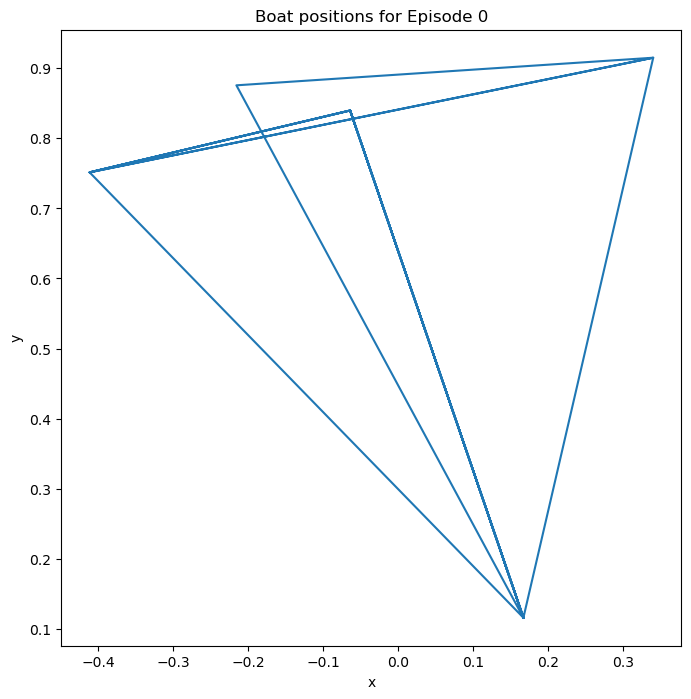

In [88]:
import matplotlib.pyplot as plt

# select the boat positions for episode 0
boat_plot_ep0 = boat_plot_all_ep[:32]

# reshape the boat positions into (x, y) pairs
boat_plot_ep0 = boat_plot_ep0.reshape((-1, 2))

# create the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(boat_plot_ep0[:, 0], boat_plot_ep0[:, 1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Boat positions for Episode 0')
plt.show()



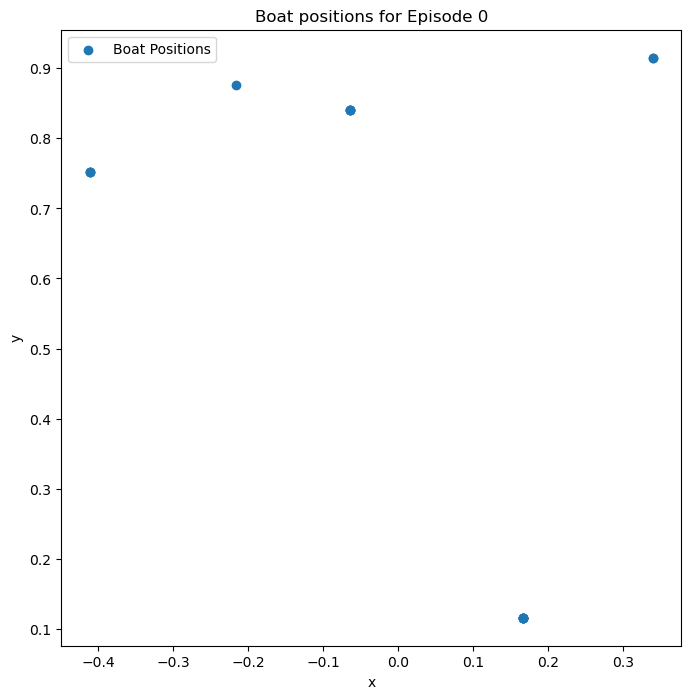

In [89]:
import matplotlib.pyplot as plt

# select the boat positions for episode 0
boat_plot_ep4 = boat_plot_all_ep[:32]

# reshape the boat positions into (x, y) pairs
boat_plot_ep4 = boat_plot_ep0.reshape((-1, 2))

# get the target position
target_pos = env.target_position

# create the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(boat_plot_ep4[:, 0], boat_plot_ep4[:, 1], label='Boat Positions')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Boat positions for Episode 0')
ax.legend()
plt.show()

#plot without random noice some points overlap

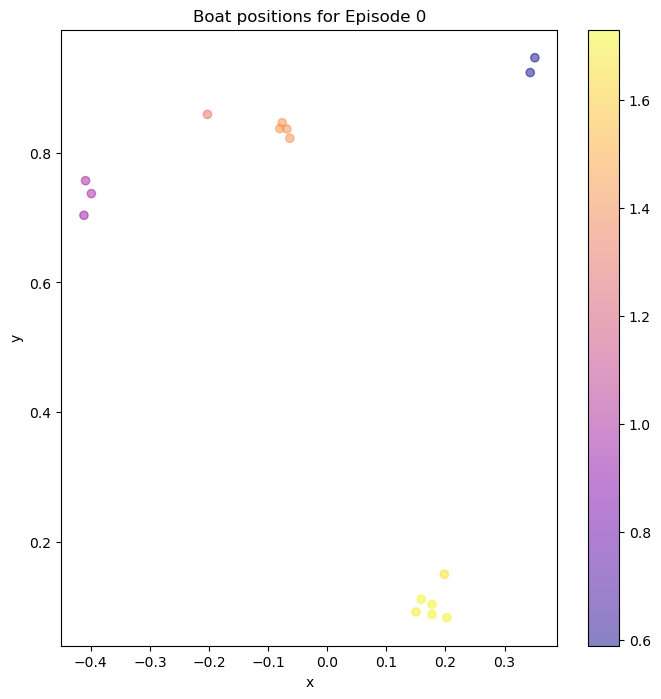

In [96]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# select the boat positions for episode 0
boat_plot_ep0 = boat_plot_all_ep[:32]

# reshape the boat positions into (x, y) pairs
boat_plot_ep0 = boat_plot_ep0.reshape((-1, 2))

# compute kernel density estimate of the boat positions
kde = gaussian_kde(boat_plot_ep0.T)

# create the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Boat positions for Episode 0')

# scatter plot with density colormap
im = ax.scatter(boat_plot_ep0[:, 0], boat_plot_ep0[:, 1], c=kde(boat_plot_ep0.T), cmap='plasma', alpha=0.5)
fig.colorbar(im, ax=ax)

plt.show()


the Q-table is a 3-dimensional numpy array with dimensions (11, 11, 3). The first two dimensions correspond to the sail and rudder configurations, respectively, and the third dimension corresponds to the Q-values for each possible action (there are 3 actions in total: sail left, sail straight, and sail right).

self.true_wind_direction is a random value between 0 and 2π.
self.boat_position is a NumPy array containing the initial position of the boat, which is (0, 0).
self.target_position is a NumPy array containing the position of the target, which is a random point within a rectangle centered at the origin with width and height of 20 units.
self.sail_configs is a NumPy array containing 11 equally spaced values between 0 and 1, representing the possible sail configurations.
self.rudder_configs is a NumPy array containing 11 equally spaced values between -π/4 and π/4, representing the possible rudder configurations.
self.q_table is a 3-dimensional NumPy array of zeros with shape (11, 11, 3), representing the Q-values for each possible combination of sail and rudder configurations.

sail_idx = np.argmin(np.abs(self.sail_configs - sail_config)) finds the index of the sail configuration that is closest to the desired sail configuration specified by sail_config. This is used to index into the first dimension of the Q-table.

rudder_idx = np.argmin(np.abs(self.rudder_configs - rudder_config)) finds the index of the rudder configuration that is closest to the desired rudder configuration specified by rudder_config. This is used to index into the second dimension of the Q-table.

q_current = self.q_table[sail_idx, rudder_idx, 0] retrieves the current Q-value for the current state and action (which is the "sail straight" action, corresponding to the index 0 in the third dimension).

q_next = np.max(self.q_table[sail_idx, rudder_idx, :]) computes the estimated Q-value for the next state, which is the maximum Q-value over all possible actions in the next state (i.e., the action that maximizes the Q-value). This is used to estimate the expected total reward that can be obtained from the next state.

self.q_table[sail_idx, rudder_idx, 0] += self.alpha * (reward + self.gamma * q_next - q_current) updates the Q-value for the current state and action, using the Q-learning update rule

The Q-learning update equation is used to update the Q-value for the current state and action. The Q-value for the current state and action is q_current, and q_next is the maximum Q-value for the next state. The update is performed as follows:

new_q_value = old_q_value + learning_rate * (reward + discount_factor * max_q_next - old_q_value)

where learning_rate is the step size, reward is the reward obtained from the current action, discount_factor is the discount factor for future rewards, and max_q_next is the maximum Q-value for the next state.

In the code, q_current is the current Q-value for the current state and action, and q_next is the maximum Q-value for the next state. The Q-value for the current state and action is updated using the above equation, and the new value is stored back in the Q-table.

relative_wind_direction = self.true_wind_direction - np.arctan2(*self.boat_position[::-1])
self.true_wind_direction: This is a scalar value that represents the direction of the wind, expressed in radians.
np.arctan2(*self.boat_position[::-1]): This is a function call to np.arctan2, which computes the arctangent of the ratio of two given inputs. In this case, the inputs are the components of the boat's position vector, reversed using [::-1]. The * before self.boat_position[::-1] unpacks the tuple of components into separate arguments for the np.arctan2 function. The resulting output is the angle in radians between the positive x-axis and a line connecting the boat's position to the origin.
self.true_wind_direction - np.arctan2(*self.boat_position[::-1]): This subtracts the angle from step 2 from the wind direction angle from step 1, resulting in the relative wind direction, which is the angle in radians between the boat's heading and the direction of the wind.
Overall, this line of code is computing the relative wind direction, which is an important parameter for calculating the sail force applied to the boat in the subsequent lines of code.